In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mixed = pd.read_csv("Screenshots/Mixed_Data_Types/data.txt",delimiter=", ")
floats = pd.read_csv("Screenshots/All_Floats/data.txt", delimiter=", ")
mixed.head()

/tmp/ipykernel_3936925/3215208574.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  mixed = pd.read_csv("Screenshots/Mixed_Data_Types/data.txt",delimiter=", ")
/tmp/ipykernel_3936925/3215208574.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  floats = pd.read_csv("Screenshots/All_Floats/data.txt", delimiter=", ")


,autoflush,TreeCompressionFactor,FileSize,DiskMean,RMS,RealTime,CPUTime
0,10000 entries,1.46,450073963,0.070447,0.000187,34.86,33.77
1,100 entries,1.45,457486562,0.086332,0.000870,38.01,36.76
2,30 MBytes,1.46,447324748,0.088000,0.001513,35.86,34.74
3,10 MBytes,1.46,450070831,0.076422,0.002238,35.21,34.12
4,Disabled,1.46,420333403,0.102143,0.006089,38.27,36.28


In [4]:
# combining datasets
mixed["datatype"] = "mixed"
floats["datatype"] = "floats"
combined = pd.concat([mixed,floats])
df_melted = combined.melt(id_vars=["autoflush", "datatype","CPUTime","FileSize","DiskMean","RMS","RealTime"])
df_melted

,autoflush,datatype,CPUTime,FileSize,DiskMean,RMS,RealTime,variable,value
0,10000 entries,mixed,33.77,450073963,0.070447,0.000187,34.86,TreeCompressionFactor,1.46
1,100 entries,mixed,36.76,457486562,0.086332,0.000870,38.01,TreeCompressionFactor,1.45
2,30 MBytes,mixed,34.74,447324748,0.088000,0.001513,35.86,TreeCompressionFactor,1.46
3,10 MBytes,mixed,34.12,450070831,0.076422,0.002238,35.21,TreeCompressionFactor,1.46
4,Disabled,mixed,36.28,420333403,0.102143,0.006089,38.27,TreeCompressionFactor,1.46
5,10000 entries,floats,35.38,505671048,0.094901,0.000826,36.40,TreeCompressionFactor,1.30
6,100 entries,floats,36.74,509559509,0.106099,0.001015,37.72,TreeCompressionFactor,1.30
7,30 MBytes,floats,35.86,493840510,0.105851,0.000618,37.00,TreeCompressionFactor,1.30
8,10 MBytes,floats,35.31,504817072,0.102059,0.000752,36.36,TreeCompressionFactor,1.30
9,Disabled,floats,37.12,493049239,0.119669,0.000593,39.08,TreeCompressionFactor,1.30


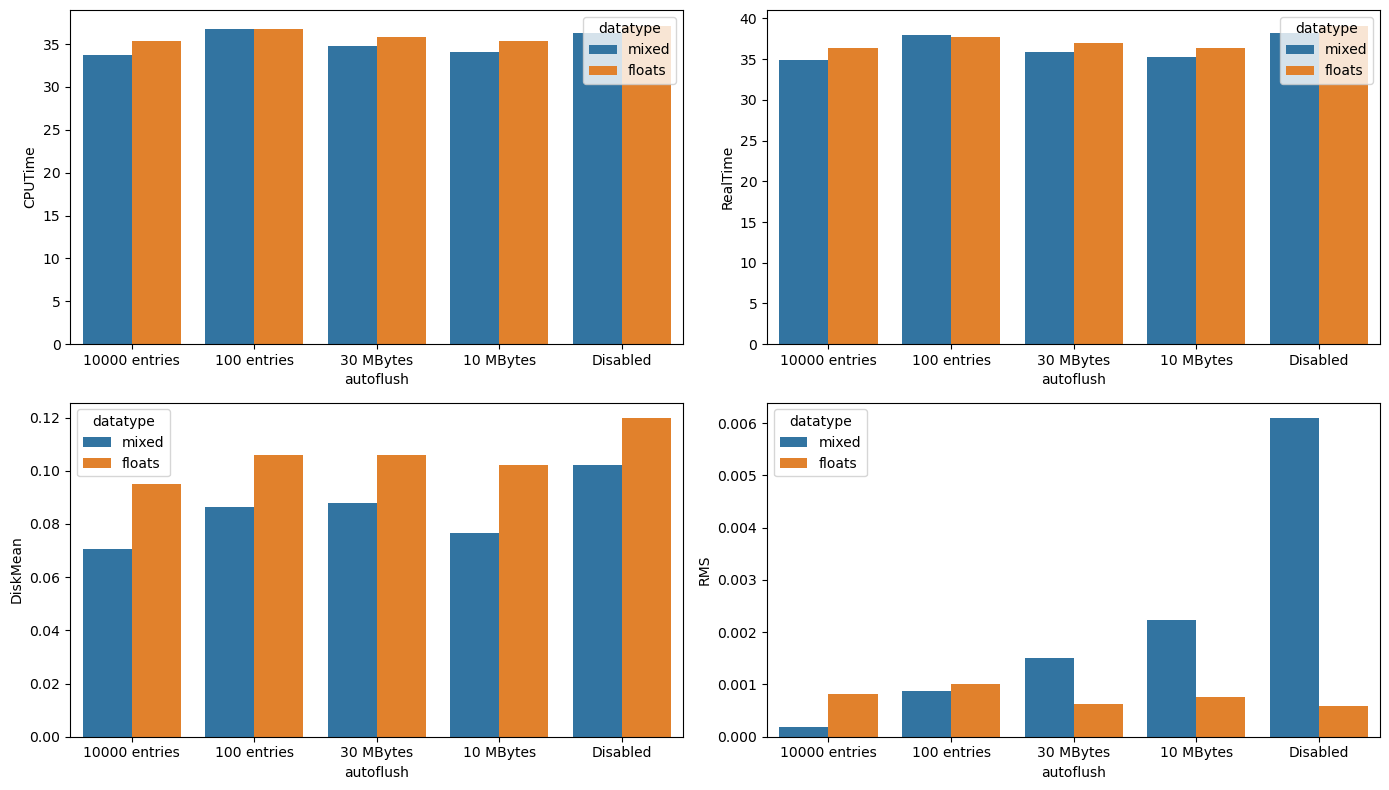

In [8]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(14,8))

sns.barplot(df_melted, x="autoflush", y="CPUTime", hue="datatype", ax=ax1)
sns.barplot(df_melted, x="autoflush", y="RealTime", hue="datatype", ax=ax2)
sns.barplot(df_melted, x="autoflush", y="DiskMean", hue="datatype", ax=ax3)
sns.barplot(df_melted, x="autoflush", y="RMS", hue="datatype", ax=ax4)
plt.tight_layout()
plt.savefig("datatype_analysis.png");

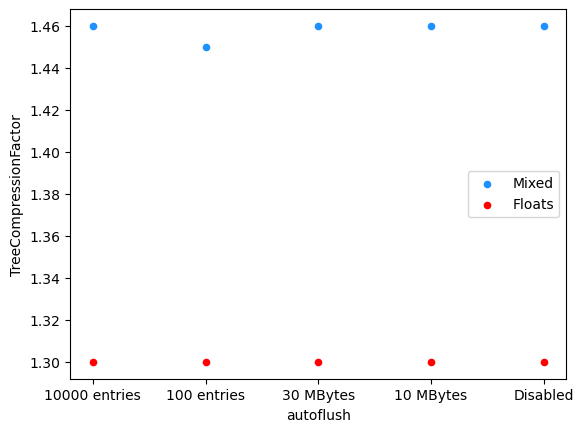

In [6]:
fig, ax = plt.subplots()
mixed.plot(x="autoflush", y="TreeCompressionFactor",kind="scatter", ax=ax, label="Mixed", color="dodgerblue")
floats.plot(x="autoflush", y="TreeCompressionFactor",kind="scatter",ax=ax, label="Floats",color="red")
plt.savefig("datatype_analysis_compressfactor.png");

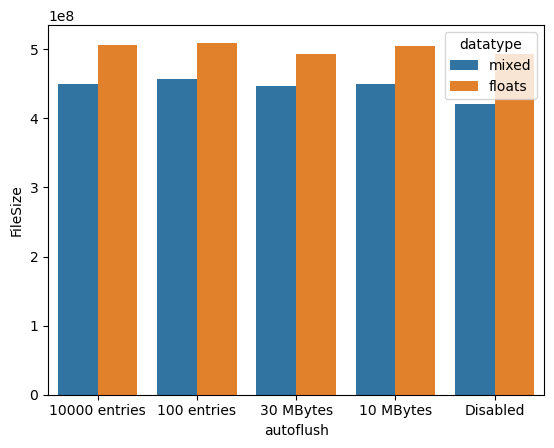

In [7]:
sns.barplot(df_melted, x="autoflush", y="FileSize", hue="datatype");
